<a href="https://colab.research.google.com/github/Sunflower47/Portfolio/blob/main/recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Восстановить изображение, очистив от шума с помощью SVD-разложения

#Код

##Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Скачивание данных

In [ ]:
with np.load('/content/drive/MyDrive/Colab Notebooks/data.npz') as data:
  A, C = data['A'], data['C']

##Преобразование матрицы в вектор и вектора в матрицу

In [ ]:
def mat2vec(A):
  h, w = A.shape
  a = np.zeros(h*w, dtype = A.dtype)
  A = np.flipud(A)
  for i , row in enumerate(A):
    a[i*w:i*w+w] = row
  return a

def vec2mat(a, shape):
  h, w = shape
  A = np.zeros(shape, dtype = a.dtype)
  for i in range(h):
    A[i, :] = a[i*w:i*w+w]
  return np.flipud(A)

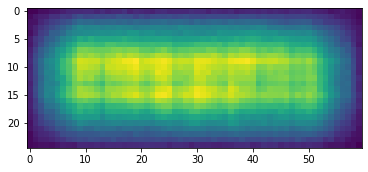

In [ ]:
plt.imshow(A)

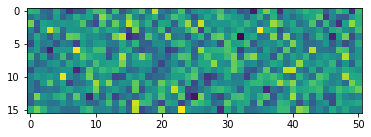

In [ ]:
B0 = np.random.normal(0, 1,(16, 51))
plt.imshow(B0)

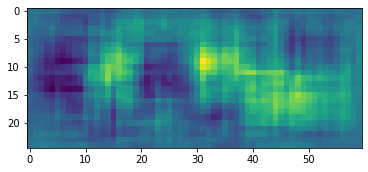

In [ ]:
b0 = mat2vec(B0)
b = C@b0
B = vec2mat(b, (25, 60))
plt.imshow(B)

In [ ]:
s,v,d = np.linalg.svd(C) 

diag = np.zeros(np.shape(C))
for i in range(len(v)):
  diag[i][i] = v[i]

print('det C = ', np.linalg.det(np.transpose(diag)@diag), '=> система переодопределена')

det C =  0.0 => система переодопределена


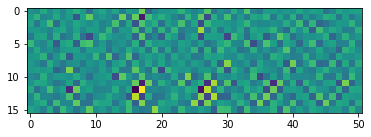

In [ ]:
diag = np.zeros(np.shape(np.transpose(C)))
for i in range(len(v)):
  if v[i] != 0:
   diag[i][i] = 1/v[i]

a0 = np.transpose(d)@diag@np.transpose(s)@mat2vec(A)
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0)

##Восстановление и визуализация результата

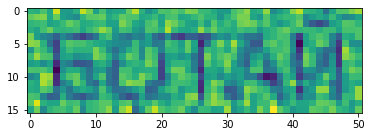

In [ ]:
s,v,d = np.linalg.svd(C) 
for i in range(len(v)):
  v[i] = round(v[i], 1)

diag = np.zeros(np.shape(np.transpose(C)))
for i in range(len(v)):
  if v[i] != 0:
   diag[i][i] = 1/v[i]

a0 = np.transpose(d)@diag@np.transpose(s)@mat2vec(A)
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0)